# Step 1: Reading the dataset 

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dataset = pd.read_csv("spam.csv", encoding = "latin-1")
dataset = dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)#cắt bỏ 3 cột cuối không có giá trị
dataset = dataset.rename(columns   = {'v1':'label','v2':'SMS'})#đặt lại tên cột 
cols = ['label','SMS']
dataset = dataset[cols]

# Replace ham with 0 and spam with 1
#dataset = dataset.replace(['ham','spam'],[0, 1])

print(dataset)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     label                                                SMS
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


# Step 2:  Cleaning the text

In [ ]:
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', dataset['SMS'][i])    #loại bỏ tất cả ký tự không phải chữ cái tại hàng i cột v2
    review = review.lower()    #chuyển tất cả ký tự thành in thường
    review = review.split()   #tách chuỗi sms thành các từ riêng biệt
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #loại bỏ các từ không có nhiều ý nghĩa, chuyển các từ về dạng nguyên mẫu
    review = ' '.join(review)  #nối những các chuỗi sms sau khi xử lí lại 
    corpus.append(review)


Creat the bags of works and split the dataset 

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= None)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,0].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size= 0.8, random_state=0)


# Step 3: Training model 


In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Step 4: Acc score and confusion matrix


In [ ]:
#Checking Model's result
score_test = []
score_train = []
name_model = ['SVM']
from sklearn.metrics import accuracy_score 
score_test.append(accuracy_score(y_test, clf.predict(X_test)))
score_train.append(accuracy_score(y_train, clf.predict(X_train)))

df_compare = pd.DataFrame([name_model,score_train,score_test]).T
df_compare.columns = ['Name-model','train','test']
print("\n Accurancy on trainset & testset")
print(df_compare)





 Accurancy on trainset & testset
  Name-model     train     test
0        SVM  0.999551  0.98296


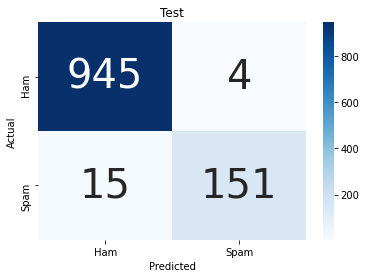

Confusion matrix
 [[945   4]
 [ 15 151]]
rate: 0.9829596412556054


In [ ]:
#Calculate Confusion Matrix on Testset
cm_test = confusion_matrix(y_test, clf.predict(X_test))
sb.heatmap(cm_test, annot = True, fmt = 'g', cmap = 'Blues', annot_kws = {"size": 40},yticklabels=["Ham", "Spam"],xticklabels=["Ham", "Spam"])
plt.title("Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Pic 2.png")
plt.show()
print("Confusion matrix\n",cm_test)
print("rate:",(float)(sum(cm_test[i][i] for i in range(2))/sum(cm_test[i][j] for i in range(2) for j in range(2))))
